In [5]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Loading the data

In [6]:
# reading the csv as data frames
movies = pd.read_csv('data/movies_metadata.csv')
credits = pd.read_csv('data/credits.csv')

/tmp/ipykernel_25629/3431764758.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('data/movies_metadata.csv')


In [7]:
# set movie id as index
movies.set_index('id', inplace=True)

# 2. Genres

In [40]:
# extract all genres
genre_in_movie = []
for _, row in movies.iterrows():
    for g in ast.literal_eval(row.genres):
        genre_in_movie.append([g["name"], g["id"]])

In [41]:
# convert genre movie to dataframe
genre_in_movie = pd.DataFrame(genre_in_movie)
genre_in_movie.columns = ["genre", "id"]
genre_in_movie["count"] = 0

In [46]:
# group genres and count number of movies + sort
sorted_genres = genre_in_movie.groupby(['genre', 'id']).count().sort_values(by="id")

In [47]:
# only keep relevant genres and change columns
sorted_genres = sorted_genres[sorted_genres.values > 1]
sorted_genres.drop(columns=['count'], inplace=True)
sorted_genres['color'] = '#000000'

In [75]:
# display genres by usage
genres = sorted_genres.reset_index().to_dict('records')
genres

[{'genre': 'Adventure', 'id': 12, 'color': '#000000'},
 {'genre': 'Fantasy', 'id': 14, 'color': '#000000'},
 {'genre': 'Animation', 'id': 16, 'color': '#000000'},
 {'genre': 'Drama', 'id': 18, 'color': '#000000'},
 {'genre': 'Horror', 'id': 27, 'color': '#000000'},
 {'genre': 'Action', 'id': 28, 'color': '#000000'},
 {'genre': 'Comedy', 'id': 35, 'color': '#000000'},
 {'genre': 'History', 'id': 36, 'color': '#000000'},
 {'genre': 'Western', 'id': 37, 'color': '#000000'},
 {'genre': 'Thriller', 'id': 53, 'color': '#000000'},
 {'genre': 'Crime', 'id': 80, 'color': '#000000'},
 {'genre': 'Documentary', 'id': 99, 'color': '#000000'},
 {'genre': 'Science Fiction', 'id': 878, 'color': '#000000'},
 {'genre': 'Mystery', 'id': 9648, 'color': '#000000'},
 {'genre': 'Music', 'id': 10402, 'color': '#000000'},
 {'genre': 'Romance', 'id': 10749, 'color': '#000000'},
 {'genre': 'Family', 'id': 10751, 'color': '#000000'},
 {'genre': 'War', 'id': 10752, 'color': '#000000'},
 {'genre': 'Foreign', 'id': 

In [ ]:
# Define genre colors (partially from https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12)
genres = [
    {'genre': 'Adventure', 'id': 12, 'color': '#fdbf6f'},
    {'genre': 'Action', 'id': 28, 'color': '#ff7f00'},
    {'genre': 'Romance', 'id': 10749, 'color': '#fb9a99'},
    {'genre': 'Drama', 'id': 18, 'color': '#e31a1c'},
    {'genre': 'Fantasy', 'id': 14, 'color': '#a6cee3'},
    {'genre': 'Science Fiction', 'id': 878, 'color': '#1f78b4'},
    {'genre': 'Animation', 'id': 16, 'color': '#ffff99'},
    {'genre': 'Comedy', 'id': 35, 'color': '#b2df8a'},
    {'genre': 'Family', 'id': 10751, 'color': '#33a02c'},
    {'genre': 'Horror', 'id': 27, 'color': '#5e7563'},
    {'genre': 'Thriller', 'id': 53, 'color': '#2f3b32'},
    {'genre': 'Mystery', 'id': 9648, 'color': '#b816b8'},
    {'genre': 'Crime', 'id': 80, 'color': '#cab2d6'},
    {'genre': 'Western', 'id': 37, 'color': '#b15928'},
    {'genre': 'War', 'id': 10752, 'color': '#6a3d9a'},
    {'genre': 'Foreign', 'id': 10769, 'color': '#820096'},
    {'genre': 'History', 'id': 36, 'color': '#300008'},
    {'genre': 'Music', 'id': 10402, 'color': '#e5f53b'},
    {'genre': 'Documentary', 'id': 99, 'color': '#1403a6'},
    {'genre': 'TV Movie', 'id': 10770, 'color': '#8a6629'}
]

# 3. Actors and movies

In [76]:
# extract all actors
cast_in_movie = []
for _, r in credits.cast.iteritems():
    for g in ast.literal_eval(r):
        cast_in_movie.append([g["name"], g["id"]])

In [77]:
# convert actor movie to dataframe
cast_in_movie = pd.DataFrame(cast_in_movie)
cast_in_movie.columns = ["actor", "movie_id"]

In [78]:
# group actors and count number of movies + sort
sorted_actors = cast_in_movie.groupby('actor').count().rename(columns={"movie_id": "movie_count"}).sort_values(by="movie_count", ascending=False)

In [79]:
# display number of actors
sorted_actors.shape

(202747, 1)

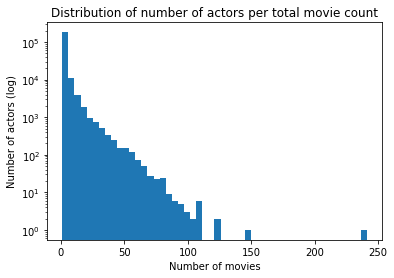

In [80]:
# display histogram of actors with number of movies
plt.hist(sorted_actors, bins=50, log=True)
plt.xlabel("Number of movies")
plt.ylabel("Number of actors (log)")
plt.title("Distribution of number of actors per total movie count")
plt.savefig("plots/actors_distribution.png")
plt.show()

In [81]:
# keep only actors that were in 20 or more movies
top_actors = sorted_actors[sorted_actors.movie_count >= 20]

In [82]:
# display number of top actors
top_actors.shape

(3776, 1)

In [83]:
# display top actors
top_actors

,movie_count
actor,
Bess Flowers,241
Christopher Lee,148
John Wayne,125
Samuel L. Jackson,123
Gérard Depardieu,110
...,...
Tony Roberts,20
Vic Tayback,20
Andrew Duggan,20


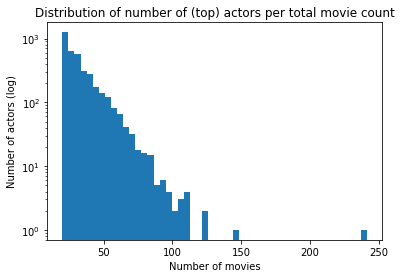

In [84]:
# display histogram of top actors with number of movies
plt.hist(top_actors, bins=50, log=True)
plt.xlabel("Number of movies")
plt.ylabel("Number of actors (log)")
plt.title("Distribution of number of (top) actors per total movie count")
plt.show()

In [85]:
# number of movies 
movies.shape

(45466, 23)

In [86]:
# get ids of the movies of the top actors
top_actors_movies_ids = pd.Series(cast_in_movie[cast_in_movie.actor.isin(top_actors.index)].movie_id.unique()).map(str)

In [20]:
# number of movies of the top actors
top_actors_movies_ids.shape

(3968,)

In [21]:
# get the movie metadata for those that we have in our dataset
top_actors_movies = movies.loc[top_actors_movies_ids[top_actors_movies_ids.isin(movies.index)]]
# display filtered number of movies
top_actors_movies.shape

(1399, 23)

In [22]:
top_actors_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
12900,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0266425,en,Conspiracy,The historical recreation of the 1942 Wannsee ...,4.633229,...,2001-05-19,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One meeting. Six million lives.,Conspiracy,False,6.9,77.0
12133,False,NaN,65000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0838283,en,Step Brothers,Brennan Huff and Dale Doback might be grown me...,8.579638,...,2008-07-25,128107642.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,They grow up so fast.,Step Brothers,False,6.5,1084.0
2157,False,NaN,80000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",NaN,tt0120738,en,Lost in Space,The prospects for continuing life on Earth in ...,12.000579,...,1998-04-03,136159423.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Danger, Will Robinson!",Lost in Space,False,5.0,395.0
205,False,NaN,17500000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.metrofilms.com/hotelrwanda/,tt0395169,en,Hotel Rwanda,"Inspired by true events, this film takes place...",10.262332,...,2004-09-11,38000000.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"When the world closed its eyes, he opened his ...",Hotel Rwanda,False,7.5,805.0
10739,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0313792,en,Anything Else,"Jerry Falk, an aspiring writer in New York, fa...",11.10416,...,2003-08-27,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In any relationship one person always does the...,Anything Else,False,6.2,151.0


# 4. Movie revenues and ratings

In [23]:
# all movies average revenue
movies.revenue.mean()

11209348.539265288

In [24]:
# selected movies average revenue
top_actors_movies.revenue.mean()

31749677.249463905

In [25]:
# all movies average rating
movies.vote_average.mean()

5.618207215133889

In [26]:
# selected movies average rating
top_actors_movies.vote_average.mean()

6.176769120800578